In [20]:
import requests
from glob import glob
from bs4 import BeautifulSoup
import pandas as pd 
from datetime import datetime
from time import sleep


In [21]:
# http://www.networkinghowtos.com/howto/common-user-agent-list/ for checking header

HEADERS = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
            'Accept-Language' : 'en-US, en;q=0.5'})


In [22]:
url = 'https://www.amazon.in/Renewed-Ultimate-Portable-Bluetooth-Wireless/dp/B07VFJ1SGD/?_encoding=UTF8&pd_rd_w=z1gH3&pf_rd_p=b2fb85bb-38e0-443f-a581-fd964c948cc8&pf_rd_r=Y9R27ZD5HN4NDKGKH2ST&pd_rd_r=8cb902e3-f410-4de1-88ce-c6f7fd52876b&pd_rd_wg=a4lNf&ref_=pd_gw_unk'

In [23]:
page = requests.get(url,headers = HEADERS)
soup = BeautifulSoup(page.content,features="lxml")

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a
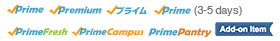
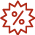

In [24]:
soup

In [25]:
title = soup.find(id = 'productTitle').get_text().strip()
title

'(Renewed) Ultimate Ears Boom 3 Portable Bluetooth Wireless Speaker (Sunset Red)'

In [30]:
#Price
price =  soup.find(id ='priceblock_ourprice').get_text().replace('₹','')
price

'8,799.00'

In [37]:
#Review star
review_start = soup.select('.a-star-4-5')[0].get_text()
review_start

'4.5 out of 5 stars'

In [56]:
#Review count
review_count = soup.select('#acrCustomerReviewText')[0].get_text()
review_count

'845 ratings'

In [59]:
# checking if there is "Out of stock" and if not, it means the product is available
try:
    soup.select('#availability .a-color-state')[0].get_text().strip()
    stock = 'Out of Stock'
except:
    stock = 'Available'

   

In [60]:
stock

'Available'